■ 크롤링(Crawling)<br>
 ● 조직적 / 자동화된 방법으로 데이터를 탐색 / 수집 하는 것<br>
 ● 데이터 수집 절차
 - 원하는 URL에 request를 보내고 결과를 받는다
 - URL :  **uniform/universal resource locator**: 인터넷상의 파일 주소
 - 받은 결과물(HTML / JSON / XML)을 파싱(Parsing)한다<Br>
 - 필요한 정보만 추출한다<Br>
● 파이썬에서 크롤링을 하기 위해 필요한 **라이브러리**
 - 데이터 통신 : **requests** / urllib / urllib2
 - 파싱 : bs4 (BeautifulSoup)

requests 설치 : conda install requests

In [140]:
import requests

result = requests.get('http://ggoreb.com/http')

In [141]:
result.status_code #잘 받아왔으면 200, 잘못 받아오면 404

200

In [142]:
result.encoding = 'utf-8'

In [143]:
result.text

"<html lang='ko'>\n<head>\n    <meta charset='utf-8' >\n</head>\n<body>\n    <h3>\n        <a href='#'>허니비</a>\n    </h3>\n</body>\n</html>"

In [144]:
type(result.text)

str

In [145]:
def get_html(url):
    html = ''
    res = requests.get(url)
    if res.status_code == 200:
        res.encoding = 'euc-kr'
    html = res.text
    return html

In [147]:
import requests
res = requests.get('http://ggoreb.com/python/request.jsp')
print(res.status_code)
print(res.text)

200



method : GET<br>
query string<br>
<br><br>
header<br>
key : accept, value : */*<br>
key : Accept-Encoding, value : gzip, deflate<br>
key : connection, value : close<br>
key : host, value : ggoreb.com<br>
key : HOSTING_CONTINENT_CODE, value : AS<br>
key : HOSTING_COUNTRY_CODE, value : KR<br>
key : HOSTING_WHITE_IP, value : false<br>
key : user-agent, value : python-requests/2.22.0<br>
key : X-Forwarded-Proto, value : http<br>
key : X-SERVER_PORT, value : 80<br>
key : X-SERVER_PROTOCOL, value : HTTP/1.1<br>
key : X-SIMPLEXI, value : 222.107.238.25<br>
key : content-length, value : 0<br>



In [148]:
import requests
param = { 'age': 30, 'name': 'python','gender' : 'Male' }
res = requests.get('http://ggoreb.com/python/request.jsp', params=param)
print(res.text)




method : GET<br>
query string<br>
key : name, value : python<br>
key : age, value : 30<br>
key : gender, value : Male<br>
<br><br>
header<br>
key : accept, value : */*<br>
key : Accept-Encoding, value : gzip, deflate<br>
key : connection, value : close<br>
key : host, value : ggoreb.com<br>
key : HOSTING_CONTINENT_CODE, value : AS<br>
key : HOSTING_COUNTRY_CODE, value : KR<br>
key : HOSTING_WHITE_IP, value : false<br>
key : user-agent, value : python-requests/2.22.0<br>
key : X-Forwarded-Proto, value : http<br>
key : X-SERVER_PORT, value : 80<br>
key : X-SERVER_PROTOCOL, value : HTTP/1.1<br>
key : X-SIMPLEXI, value : 222.107.238.25<br>
key : content-length, value : 0<br>



In [149]:
import requests
header = { 'accept-language':'en'}
res = requests.get('http://youtube.com', headers=header)
print(res.status_code)
print(res.text)

200
  <!DOCTYPE html><html lang="en" data-cast-api-enabled="true"><head><style name="www-roboto" >@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:local('Roboto Regular'),local('Roboto-Regular'),url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:local('Roboto Italic'),local('Roboto-Italic'),url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:italic;font-weight:500;src:local('Roboto Medium Italic'),local('Roboto-MediumItalic'),url(//fonts.gstatic.com/s/roboto/v18/KFOjCnqEu92Fr1Mu51S7ACc6CsE.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:local('Roboto Medium'),local('Roboto-Medium'),url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}</style><script name="www-roboto" >if (document.fonts && document.fonts.load) {do

In [152]:
import requests
result = get_html('http://ggoreb.com/python/html/data1.html')
result

'<!DOCTYPE html>\n<html>\n<body>\n\n<h2>Basic HTML Table</h2>\n\n<table style="width:100%">\n  <tr>\n    <th>Firstname</th>\n    <th>Lastname</th> \n    <th>Age</th>\n  </tr>\n  <tr>\n    <td>Jill</td>\n    <td>Smith</td>\n    <td>50</td>\n  </tr>\n  <tr>\n    <td>Eve</td>\n    <td>Jackson</td>\n    <td>94</td>\n  </tr>\n  <tr>\n    <td>John</td>\n    <td>Doe</td>\n    <td>80</td>\n  </tr>\n</table>\n\n</body>\n</html>\n'

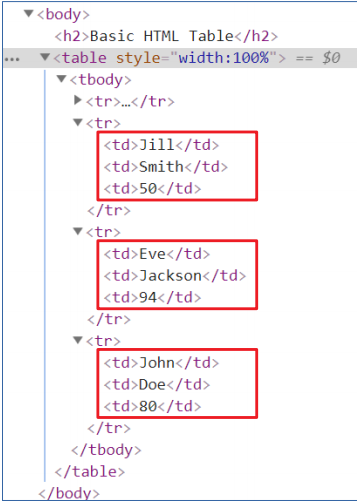

In [153]:
s_idx = 0 #td가 시작하는 곳 
e_idx = 0 # / 로 끝내는 곳 
while True:
    s_idx = result.find('<td>', s_idx) #td를 찾아라. 
    if s_idx == -1: break
    e_idx = result.find('</td>', s_idx) # / 를 찾아라. 
    print(result[s_idx+4:e_idx])
    s_idx = e_idx
    
    

Jill
Smith
50
Eve
Jackson
94
John
Doe
80


In [154]:
result = get_html('http://finance.naver.com/')
result

'<html lang="ko">\n <head> \n  <title>네이버 금융</title> \n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> \n  <meta http-equiv="Content-Script-Type" content="text/javascript" /> \n  <meta http-equiv="Content-Style-Type" content="text/css" /> \n  <meta property="og:title" content="네이버 금융" /> \n  <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" /> \n  <meta property="og:url" content="https://finance.naver.com" /> \n  <meta property="og:description" content="국내 해외 증시 지수, 시장지표, 펀드, 뉴스, 증권사 리서치 등 제공" /> \n  <meta property="og:type" content="article" /> \n  <meta property="og:article:thumbnailUrl" content="" /> \n  <meta property="og:article:author" content="네이버금융" /> \n  <meta property="og:article:author:url" content="http://FINANCE.NAVER.COM" /> \n  <link rel="stylesheet" type="text/css" href="/css/finance_header.css?20200107172122" /> \n  <link rel="stylesheet" type="text/css" href="/css/finance.css?20200107172122"

In [155]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(result, 'html.parser')

In [156]:
nums = soup.select('.num_quot>.num')
for num in nums :
    print(num.getText())

2,248.09
686.08
302.73


In [162]:
import requests
soup = BeautifulSoup(res.text, 'html.parser')
address = 'http://ggoreb.com/python/html/number.html'
res = requests.get(address)
res.encoding = 'euc-kr'

imgs = soup.select('img')
for img in imgs:
    print(img['alt'])



제
1
4
10
12
28
45
26


In [165]:
import requests
soup = BeautifulSoup(res.text, 'html.parser')
address = 'http://ggoreb.com/python/html/attribute.html'
res = requests.get(address)
res.encoding = None

imgs = soup.select('img')
for img in imgs:
    print(img['title'])


루피
나미
로빈
조로


In [159]:
import requests
from bs4 import BeautifulSoup as bs
address = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
res = requests.get(address)
res.encoding = None

In [96]:
res.text

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\r\n\r\n\t\r\n\t\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\t\t\r\n\t\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\t\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\t\r\n\t\r\n\r\n<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\r\n\r\n\r\n\r\n\r\n\r\n<meta property="me2:image" content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg"/>\r\n<meta property="me2:post_tag" content="네이버영화 "/>\r\n<meta property="me2:category1" content="네이버영화"/>\r\n<meta property="me2:category2" content=""/>\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\t\r\n\t\t<meta property="og:title" content="랭킹 : 네이버 영화"/>\r\n\t\t\r\n\t\t\t\r\n\t\t\t\t<meta property="o

In [97]:
soup = BeautifulSoup(res.text, 'html.parser')

In [12]:
a_list=soup.select('.tit3>a')
for a in a_list:
    
    print(a.getText())
          

NameError: name 'soup' is not defined

In [17]:

from bs4 import BeautifulSoup as bs
import requests

In [42]:
res = requests.get(address)
res.encoding = None
soup = BeautifulSoup(res.text, 'html.parser')
address = 'http://www.wemakeprice.com/main/100030'



w_list = soup.select('.box_desc>.tit_desc')
for w in w_list:
     print(w.getText())


[쿠폰+카드 중복할인] 바디픽셀 정품 머슬건 무선 진동 마사지건 (기본구성)
유스마일 EMS 저주파 안마기 NO.1536
[최대혜택가 382,040원] 삼성 갤럭시 A50 자급제폰 공기계 새상품 일반
[최종혜택가 399,000원] 삼성 노트북5 NT550EBZ-AD2A
2020년형 // 아이프리 세탁소용 충전식 보풀제거기 추천 FX-714  칼날2개 구성
엘지전자 모니터 베스트모음전
[1월21일설치][LG전자] 27GL650F 27인치 144Hz 울트라기어 게이밍모니터 
[디지털위크] 닌텐도 스위치 네온 HAD / 그레이 HAD 본체 + 다수 타이틀 택1 / 포켓몬스터 소드/실드/마리오카트8/마리오파티
[최대혜택가 382,040원] 삼성전자 갤럭시A50 64GB 블랙 자급제폰 공기계 새상품 SM-A505N
샌디스크 USB 메모리카드 듀얼 OTG 5핀 C타입 대용량 16G 32G 64G 128G 256G
[디지털위크] [쿠폰 + 카드중복할인] 한일 EMF 무자계 항균 전기요 전기장판 무전자 전기매트
윈도우+오피스365 즉시배송
윈도우+오피스 특가할인 바로배송
[디지털위크] 최신 PC부품 모음전(라이젠 2700X 한정수량 초특가)
벡셀 알카라인 건전지 AA/AAA 20알
MS윈도우 10 설치 USB + 홈/프로 정품키
[디지털위크] [쿠폰+카드중복할인] ASUS 초경량 비보북 X560UD / A407MA 노트북 특가모음전!
[노바리빙] LED모던 미니 체중계
[디지털위크] [쿠폰+카드 중복할인] JMW 항공모터 드라이기&고데기 특가전
(1+1) 무료배송/고속충전기/고속케이블/급속충전기/5핀/8핀/C타입/삼성/LG/아이폰 호환 정품 충전기
[디지털위크] 공식인증점 위닉스 공기청정기 15평형 제로3.0 AZGE500-JWK*
[디지털위크] [공식인증점] 위닉스 종합선물세트! 공기청정기 제로S, 건조기, 제습기 어셈블!
최종가확인!★ 브라운체온계 #IRT6510 #IRT6520 #IRT6030 필터 21개 포함
(20년형) 아이프리 세탁소용 충전식 보풀제거기 FX-71

In [44]:
soup = BeautifulSoup(res.text, 'html.parser')
address = 'https://www.coupang.com/np/categories/178951'
res = requests.get(address)
res.encoding = None


c_list = soup.select('.dd.descriptions div name')
c_list

ConnectionError: ('Connection aborted.', OSError("(10060, 'WSAETIMEDOUT')"))

select <= List 한개
find <= obj 여러개 
find_all <= obj 여러개 

In [56]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/html/example.html')
soup = BeautifulSoup(res.text, 'html.parser')
div= soup.find('div',{'class' : 'ex_class'}) #첫번째 div 를 가져옴. 

print(div.find('p'))

<p>d</p>


In [64]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://comic.naver.com/webtoon/list.nhn?titleId=670144&weekday=thu')
soup = BeautifulSoup(res.text, 'html.parser')

In [68]:

titles= soup.select('td.title > a')
# for title in titles:
#     print(title.getText())
nums = soup.select('td.num')
for num in nums :
    print(num.getText())

2020.01.15
2020.01.08
2020.01.01
2019.12.25
2019.12.18
2019.12.11
2019.12.04
2019.11.27
2019.11.20
2019.11.13


JSON  사용하기 (beautiful soup 사용 X)

In [73]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/json/data2.jsp')
result = res.json()
for r in result:
    print(r['name'], r['age'])

A 10
B 11
C 12


In [80]:
import requests
from bs4 import BeautifulSoup
res = requests.get('http://ggoreb.com/python/json/data3.jsp')
result = res.json()
result

[{'address': ['서울', '신림'], 'age': 10, 'name': 'A'},
 {'address': ['대전', '탄방'], 'age': 11, 'name': 'B'},
 {'address': ['부산', '해운대'], 'age': 12, 'name': 'C'}]

In [90]:
for obj in result:
    address = obj['address']
    for o in address:
            print(o, end=' ')
            


서울 신림 대전 탄방 부산 해운대 

### 카카오 지도 API

In [125]:
import requests
from bs4 import BeautifulSoup
address = 'https://dapi.kakao.com/v2/local/search/address.json'
params = {'query' : '서울 특별시 동작구 신대방동 395'}
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}

res = requests.get(address, params=params, headers=headers)
res.encoding = None
res

<Response [200]>

In [128]:
res.json()

{'documents': [{'address': {'address_name': '서울 동작구 신대방동 395',
    'b_code': '1159010900',
    'h_code': '1159068000',
    'main_adderss_no': '395',
    'main_address_no': '395',
    'mountain_yn': 'N',
    'region_1depth_name': '서울',
    'region_2depth_name': '동작구',
    'region_3depth_h_name': '신대방2동',
    'region_3depth_name': '신대방동',
    'sub_adderss_no': '',
    'sub_address_no': '',
    'x': '126.92261248037842',
    'y': '37.49371334710509',
    'zip_code': '156849'},
   'address_name': '서울 동작구 신대방동 395',
   'address_type': 'REGION_ADDR',
   'road_address': {'address_name': '서울 동작구 보라매로5길 28',
    'building_name': '동작구시설관리공단',
    'main_building_no': '28',
    'region_1depth_name': '서울',
    'region_2depth_name': '동작구',
    'region_3depth_name': '신대방동',
    'road_name': '보라매로5길',
    'sub_building_no': '',
    'undergroun_yn': 'N',
    'underground_yn': 'N',
    'x': '126.92272055446985',
    'y': '37.4941819414049',
    'zone_no': '07062'},
   'x': '126.92261248037842',
   'y': 

In [130]:
soup = bs(res.text, 'html.parser')
address_list = soup.find_all('address')
for addr in address_list:
    x = addr.find('x')
    y = addr.find('y')
    name = addr.find('address_name')
    print(x, y, name)

### 카카오 번역 API 사용

In [132]:
import requests
from bs4 import BeautifulSoup
address = 'https://kapi.kakao.com/v1/translation/translate'
params = {'query' : '배고프다', 'src_lang': 'kr', 'target_lang':'jp' }
headers = {'Authorization' : 'KakaoAK d4be7b479f4b4cbd99bd19ae87f88b4b'}

res = requests.get(address, params=params, headers=headers)
res.encoding = None
res

<Response [200]>

In [133]:
text = res.json()['translated_text']
print(text[0][0])

お腹が空いた
